# Tarea 5.7

#### Gonzalo Guerrero Valenzuela 20.505.512-6


-----------------------------------------------------------------------------------------------------------------------------------------------------------------------

En ausencia de una señal, un cierto detector de partículas en promedio detecta $2$ impactos por segundo debidos a una contaminación de fondo. Durante una medición se obtienen las siguientes observaciones (esta es una lista del número de señales por cada segundo de duración del experimento):

In [1]:
mediciones = [2, 3, 3, 3, 0, 1, 2, 2, 0, 4, 10, 0, 2, 4, 6, 3, 2, 1, 1, 1]

Compare estos resultados con la distribución de Poisson. Discuta en cuáles intervalos cree usted que se detectó una señal que no es contaminación.

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [2]:
#Importamos las librerias que utirlizaremos
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Creamos las funciondes correspondientes

def poisson(n, lamda): #Creamos la funcion para la distribucion de Poisson
    '''
    Esta funcion permite calcular la distribucion de Poisson para un n que sea entero o lista y un lamda
    '''    
    
    poisson = [] #Creamos una lista la cual albergara todos los valores correspondientes a la distribucion de Poisson
                 #para cada uno de los datos de la lista entregada a la función
    
    #Añadimos un condicional
    if type(n) == int:   #Si el n entregado resulta ser un entero nos regresará el valor de la distribucion de Poisson para ese valor concreto
        
        return (lamda**n)*np.exp(-lamda)/(np.math.factorial(n))
    
    else: #En caso de no ser un entero, es decir, es una lista pasa a un ciclo for
    
        for i in n:   #En este ciclo for tomamos cada uno de los valores de la lista a evaluar y le calcula la distribucion Poisson
                      #añadiendo cada uno de estos a la lista creada al inicio de la funcion regresandonos esa lista
                
            poisson.append(lamda**i*np.exp(-lamda)/np.math.factorial(i))
        return poisson

def prob(lamda, i): #Creamos una funcion a modo de reduccion de listas para la lista obtenida en la funcion anterior
    '''
    Esta funcion nos permite reducir la lista generada en la funcion 'poisson' en un numero i de elementos
    '''
    return [poisson(n, lamda) for n in range(i+1)] #Nos entrega la lista resultante

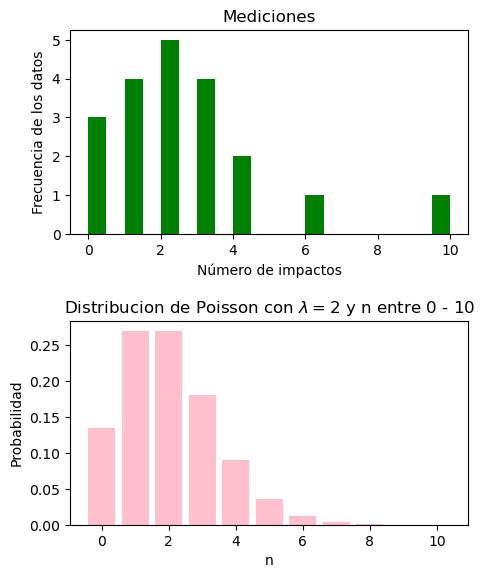

In [4]:
#A continuacion generaremos los graficos para comparar y discutir los resutados
fig = plt.figure(figsize = (5,6)) #Creamos la figura

med = fig.add_subplot(2,1,1) #Añadimos el primer grafico en forma de histograma en base a la lista 'mediciones'
med.hist(mediciones, bins = 20, color = 'green') #Tomamos los datos de ´mediciones´, elegimos un bin de 20 y color verde(green)
#Le ponemos nombres a los ejes y un titulos al grafico
med.set_title('Mediciones')
med.set_xlabel('Número de impactos')
med.set_ylabel('Frecuencia de los datos')


poi = fig.add_subplot(2,1,2) #Añadimos el segundo grafico, este para la distribucion de Poisson de los datos obtenidos
poi.bar(range(11), prob(2, 10), #Para este elegiremos un grafico de barras, el eje 'x' seran los numeros del 1 al 10 y el eje 'y' sera la funcion 'prob'
                                   #evaluada con un lamba 2(porque es el numero de impactos por segundo) y un i de 10(que sera el numero de datos en la lista)
            color = 'pink') #Ponemos las barras de color rosado(pink)
#Le ponemos nombre al grafico y a los ejes
poi.set_title('Distribucion de Poisson con $\lambda = 2$ y n entre 0 - 10')
poi.set_xlabel('n')
poi.set_ylabel('Probabilidad')

fig.tight_layout(pad = 1.5) #Le pedimos a la imagen una separacion oara que no queden superpuestos los titulos
plt.show()

Ahora para comparar lo primero que hare sera llamar a la funcion 'poisson' para ver si existe algun valor anomalo a lo que deberia se la distribucion de poisson.

In [5]:
poisson(mediciones, 2)

[0.2706705664732254,
 0.1804470443154836,
 0.1804470443154836,
 0.1804470443154836,
 0.1353352832366127,
 0.2706705664732254,
 0.2706705664732254,
 0.2706705664732254,
 0.1353352832366127,
 0.0902235221577418,
 3.8189850648779595e-05,
 0.1353352832366127,
 0.2706705664732254,
 0.0902235221577418,
 0.012029802954365574,
 0.1804470443154836,
 0.2706705664732254,
 0.2706705664732254,
 0.2706705664732254,
 0.2706705664732254]

En este caso encontramos que el dato numero 10 nos da un valor muy alejado del resto de valores por lo cual analizaremos los graficos para observar si este es un valor en el cual no existe contaminacion. Como se ve en el grafico de la distribucion de Poisson el porcentaje de ocurrencia para el valor 10 es muy baja por lo cual podriamos deducir que en la señal 10 no se detecto contaminacion durante la medicion.